In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import scipy.stats as ss
from sklearn.impute import SimpleImputer
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

In [2]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['META_FeatureMart.csv']))
data.head()

Saving META_FeatureMart.csv to META_FeatureMart.csv


,DATE,MKT-RF,SMB,HML,RMW,CMA,RF,ADS_INDEX,SP500,T10Y3M,...,USRECDM,USRECDP,META_OPEN,META_HIGH,META_LOW,META_CLOSE,META_ADJ CLOSE,META_VOLUME,META_DAILY_RETURN,META_RSI
0,01-03-2017,0.53,-0.24,0.33,-0.28,0.11,0.0,0.199210,2257.83,1.92,...,0,0,116.029999,117.839996,115.510002,116.860001,116.860001,20663900,NaN,NaN
1,01-04-2017,1.03,0.51,0.29,-0.37,-0.10,0.0,0.178190,2270.75,1.93,...,0,0,117.550003,119.660004,117.290001,118.690002,118.690002,19630900,0.015660,NaN
2,01-05-2017,0.50,0.02,-0.36,0.02,-0.15,0.0,0.157624,2269.00,1.85,...,0,0,118.860001,120.949997,118.320000,120.669998,120.669998,19492200,0.016682,NaN
3,01-06-2017,-0.24,-0.52,-0.49,-0.06,-0.16,0.0,0.137503,2276.98,1.89,...,0,0,120.980003,123.879997,120.029999,123.410004,123.410004,28545300,0.022707,NaN
4,01-09-2017,-0.11,0.04,-0.61,0.32,-0.34,0.0,0.079457,2268.90,1.88,...,0,0,123.550003,125.430000,123.040001,124.900002,124.900002,22880400,0.012074,NaN


In [3]:
start_date = datetime(2021,1,1)
end_date = datetime(2023,10,31)

In [4]:
data['DATE'] = pd.to_datetime(data['DATE'])
filter = (data['DATE'] >= start_date) & (data['DATE'] <= end_date)
data = data.loc[filter]
data.head()

,DATE,MKT-RF,SMB,HML,RMW,CMA,RF,ADS_INDEX,SP500,T10Y3M,...,USRECDM,USRECDP,META_OPEN,META_HIGH,META_LOW,META_CLOSE,META_ADJ CLOSE,META_VOLUME,META_DAILY_RETURN,META_RSI
1007,2021-01-04,-0.60,0.36,0.18,-0.38,0.03,0.0,0.732481,3700.65,0.84,...,0,0,274.779999,275.000000,265.200012,268.940002,268.940002,15106100,-0.015449,43.835493
1008,2021-01-05,0.72,0.50,0.47,-0.20,0.28,0.0,0.748013,3726.86,0.87,...,0,0,268.290008,272.399994,268.209992,270.970001,270.970001,9871600,0.007548,46.345849
1009,2021-01-06,0.81,0.89,2.90,-1.07,1.33,0.0,0.762357,3748.14,0.95,...,0,0,262.000000,267.750000,260.010010,263.309998,263.309998,24354100,-0.028269,39.221912
1010,2021-01-07,1.18,-0.22,-0.19,-0.63,-0.32,0.0,0.775520,3803.79,0.99,...,0,0,265.899994,271.609985,264.779999,268.739990,268.739990,15789800,0.020622,45.604899
1011,2021-01-08,0.53,-0.43,-0.99,0.00,-0.45,0.0,0.787505,3824.68,1.05,...,0,0,268.309998,268.950012,263.179993,267.570007,267.570007,18528300,-0.004354,44.519981


In [5]:
# Copying the data into another variable
data2 = data.copy()
# Normalizing the data
for column in data.columns[1:]:
    if column != 'META_ADJ CLOSE':
        data2[column] = (data[column] - data[column].mean()) / data[column].std()

In [6]:
data2.columns

Index(['DATE', 'MKT-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF', 'ADS_INDEX',
       'SP500', 'T10Y3M', 'OBMMIJUMBO30YF', 'DEXUSEU', 'DEXJPUS', 'DEXUSUK',
       'CBBTCUSD', 'CBETHUSD', 'T10YIE_X', 'DCOILBRENTEU', 'VIXCLS', 'DAAA',
       'DBAA', 'NIKKEI225', 'AMERIBOR', 'T10YIE_Y', 'T5YIE', 'BAMLH0A0HYM2',
       'BAMLH0A0HYM2EY', 'DGS10', 'DGS1', 'RIFSPPFAAD90NB', 'DCPN3M', 'DCPF1M',
       'DCOILWTICO', 'DHHNGSP', 'USRECD', 'USRECDM', 'USRECDP', 'META_OPEN',
       'META_HIGH', 'META_LOW', 'META_CLOSE', 'META_ADJ CLOSE', 'META_VOLUME',
       'META_DAILY_RETURN', 'META_RSI'],
      dtype='object')

In [7]:
# Splitting the dataset into X and y
X = data2.drop(columns=['DATE', 'META_OPEN', 'META_HIGH', 'META_LOW', 'META_CLOSE', 'META_ADJ CLOSE', 'META_DAILY_RETURN']).fillna(method='bfill')  # Dropping non-numeric columns
X = sm.add_constant(X)
y = data2['META_ADJ CLOSE']

In [8]:
# Check for null values in each column
null_columns = np.isnan(X).any(axis=0)
null_columns

const             False
MKT-RF            False
SMB               False
HML               False
RMW               False
CMA               False
RF                False
ADS_INDEX         False
SP500             False
T10Y3M            False
OBMMIJUMBO30YF    False
DEXUSEU           False
DEXJPUS           False
DEXUSUK           False
CBBTCUSD          False
CBETHUSD          False
T10YIE_X          False
DCOILBRENTEU      False
VIXCLS            False
DAAA              False
DBAA              False
NIKKEI225         False
AMERIBOR          False
T10YIE_Y          False
T5YIE             False
BAMLH0A0HYM2      False
BAMLH0A0HYM2EY    False
DGS10             False
DGS1              False
RIFSPPFAAD90NB    False
DCPN3M            False
DCPF1M             True
DCOILWTICO        False
DHHNGSP           False
USRECD             True
USRECDM            True
USRECDP            True
META_VOLUME       False
META_RSI          False
dtype: bool

In [9]:
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [10]:
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

Shape of X: (712, 36)
Shape of y: (712,)


In [11]:
# Check for null values in each column
null_columns = np.isnan(X).any(axis=0)
null_columns

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [12]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
# ------------------------------------------------------------------------------
# Benchmark Model
# ------------------------------------------------------------------------------

benchmark_prep = sm.OLS(y, X).fit()
benchmark_prep.summary()

# Create a boolean mask with the same number of columns as X
boolean_mask_benchmark = np.abs(benchmark_prep.tvalues) >= 1.96

# Select columns from X based on the boolean mask
x_benchmark = X[:, boolean_mask_benchmark]

# Get the column names from the original DataFrame (data2)
column_names = data2.columns

# Extract selected features based on the benchmark model mask
selected_features_benchmark = [column_names[i] for i, mask in enumerate(boolean_mask_benchmark) if mask]

# Continue with the rest of your code
benchmark = sm.OLS(y, x_benchmark).fit()
print(benchmark.summary())
y_hat_benchmark1 = benchmark.predict(x_benchmark)
corr_benchmark1 = ss.pearsonr(y_hat_benchmark1, y)[0]
print('\nBenchmark: corr(Y, Y_pred) = ' + str(corr_benchmark1))
print('Hard Thresholding selected ' + str(np.sum(boolean_mask_benchmark)) + ' features in the benchmark model.')
print('Selected features in the benchmark model:', selected_features_benchmark)

                            OLS Regression Results                            
Dep. Variable:         META_ADJ CLOSE   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     805.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:34:37   Log-Likelihood:                -2927.6
No. Observations:                 712   AIC:                             5903.
Df Residuals:                     688   BIC:                             6013.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        271.1050      3.168     85.569      0.0

In [14]:
# ------------------------------------------------------------------------------
# Factor Selection using Ridge Regression
# ------------------------------------------------------------------------------
# Motivation: the model sets the objective function to be the
# sum of squared residuals from OLS + penalty function
# that penalizes squared values of beta. A minimization process squeezes
# the small beta values close to 0.
# a represents the obj function's sensitivity to the penalty term
# Steo 1. run Ridge Regression and obtain coefficients
# Step 2. remove features with coefficients close to 0 and run OLS
a = 0.5
model2_prep = Ridge(alpha=a, fit_intercept=False).fit(X, y)

# Create a boolean mask for selecting columns based on the coefficients
boolean_mask = np.abs(model2_prep.coef_) >= 0.001

# Get the column names from the original DataFrame (data2)
column_names = data2.columns

# Select columns from X based on the boolean mask
x = X[:, boolean_mask]

# Continue with the rest of your code
model2 = sm.OLS(y, x).fit()
print(model2.summary())
y_pred_model2 = model2.predict(x)
corr_model2 = ss.pearsonr(y_pred_model2, y)[0]

# Print the selected features using the column_names list
selected_features = [column_names[i] for i, mask in enumerate(boolean_mask) if mask]
print('model 2 Ridge Regression: corr (Y, Y_pred) = ' + str(corr_model2))
print('Ridge Regression selected ' + str(len(selected_features)) + ' features: ', selected_features)

                            OLS Regression Results                            
Dep. Variable:         META_ADJ CLOSE   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     559.9
Date:                Sun, 10 Dec 2023   Prob (F-statistic):               0.00
Time:                        18:34:37   Log-Likelihood:                -2912.6
No. Observations:                 712   AIC:                             5895.
Df Residuals:                     677   BIC:                             6055.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        271.8904      3.493     77.844      0.0

In [15]:
selected_features

['DATE',
 'MKT-RF',
 'SMB',
 'HML',
 'RMW',
 'CMA',
 'RF',
 'ADS_INDEX',
 'SP500',
 'T10Y3M',
 'OBMMIJUMBO30YF',
 'DEXUSEU',
 'DEXJPUS',
 'DEXUSUK',
 'CBBTCUSD',
 'CBETHUSD',
 'T10YIE_X',
 'DCOILBRENTEU',
 'VIXCLS',
 'DAAA',
 'DBAA',
 'NIKKEI225',
 'AMERIBOR',
 'T10YIE_Y',
 'T5YIE',
 'BAMLH0A0HYM2',
 'BAMLH0A0HYM2EY',
 'DGS10',
 'DGS1',
 'RIFSPPFAAD90NB',
 'DCPN3M',
 'DCPF1M',
 'DCOILWTICO',
 'DHHNGSP',
 'USRECD',
 'USRECDM']

In [16]:
# Define the number of top features to keep
k = 25  # Change this to the desired number of top features

# Get the coefficients of the Ridge model (feature importance)
coefficients = model2_prep.coef_

# Create a DataFrame to associate coefficients with feature names
feature_importance_df = pd.DataFrame({'Feature Name': selected_features, 'Coefficient': coefficients})

# Sort the features by absolute coefficient value in descending order
feature_importance_df = feature_importance_df.reindex(feature_importance_df['Coefficient'].sort_values(ascending=False).index)
print(feature_importance_df)

      Feature Name  Coefficient
0             DATE   259.140288
12         DEXJPUS    69.056508
27           DGS10    65.504504
22        AMERIBOR    51.388125
8            SP500    42.704932
11         DEXUSEU    33.186397
19            DAAA    30.943248
18          VIXCLS    14.374463
10  OBMMIJUMBO30YF    13.329463
35         USRECDM    12.500841
32      DCOILWTICO    12.250178
16        T10YIE_X    11.437468
23        T10YIE_Y    11.437468
21       NIKKEI225     7.914999
25    BAMLH0A0HYM2     7.304097
14        CBBTCUSD     5.721280
26  BAMLH0A0HYM2EY     2.509179
3              HML     2.144997
4              RMW    -0.399851
2              SMB    -1.070817
31          DCPF1M    -1.763689
7        ADS_INDEX    -1.767865
1           MKT-RF    -2.232919
5              CMA    -2.782616
13         DEXUSUK    -3.449696
6               RF    -3.552529
34          USRECD    -4.666909
17    DCOILBRENTEU    -5.541300
33         DHHNGSP    -7.238471
15        CBETHUSD    -9.374807
30      

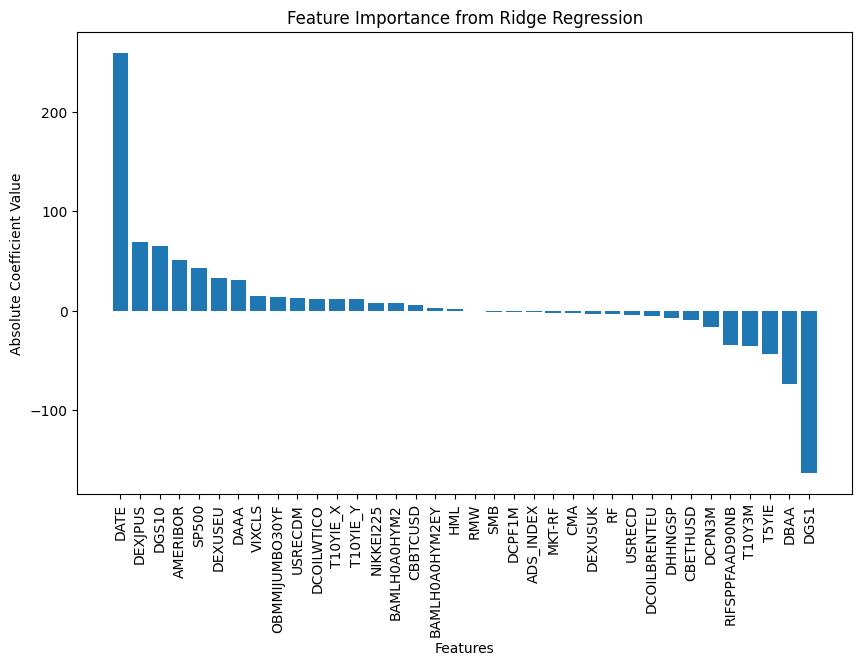

In [17]:
feature_importance_df.sort_values(by='Coefficient', ascending=False, inplace=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature Name'], feature_importance_df['Coefficient'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.title('Feature Importance from Ridge Regression')
plt.show()

In [18]:
# Select the top k features
top_features = feature_importance_df['Feature Name'][:k]
print(top_features)

0               DATE
12           DEXJPUS
27             DGS10
22          AMERIBOR
8              SP500
11           DEXUSEU
19              DAAA
18            VIXCLS
10    OBMMIJUMBO30YF
35           USRECDM
32        DCOILWTICO
16          T10YIE_X
23          T10YIE_Y
21         NIKKEI225
25      BAMLH0A0HYM2
14          CBBTCUSD
26    BAMLH0A0HYM2EY
3                HML
4                RMW
2                SMB
31            DCPF1M
7          ADS_INDEX
1             MKT-RF
5                CMA
13           DEXUSUK
Name: Feature Name, dtype: object


In [19]:
# Filter X_train and X_test to include only the top features
X_selected = X[:, [selected_features.index(feature) for feature in top_features]]
X_train_selected = X_train[:, [selected_features.index(feature) for feature in top_features]]
X_test_selected = X_test[:, [selected_features.index(feature) for feature in top_features]]

In [20]:
#####################################################
# Hyperparameter Tuning
#####################################################

# Define a range of alpha values to test
alphas = np.logspace(-6, 6, 200)

# Replace Ridge with RidgeCV
model2_prep = RidgeCV(alphas=alphas, fit_intercept=False, store_cv_values=True).fit(X_train_selected, y_train)

# Print the best alpha value
print("Best alpha value:", model2_prep.alpha_)

# Optionally, retrain Ridge model using the best alpha value
model2 = Ridge(alpha=model2_prep.alpha_, fit_intercept=False).fit(X_train_selected, y_train)

Best alpha value: 0.03827494478516307


In [21]:
y_hat = model2.predict(X_test_selected)
y_hat

array([210.11903825, 338.72729315, 333.27212486, 340.38742766,
       144.42468634, 172.16763672, 181.19477126, 271.29108141,
       102.51720577, 335.93015535, 330.27679244, 340.35479792,
       174.92438773,  97.66553334, 291.78021159, 276.19748387,
       297.43777299, 154.4366332 , 225.98884543, 272.36651933,
       341.89157766, 277.87742092, 235.61900934,  99.54516017,
       299.4501608 , 181.33766384, 232.08349018, 275.58117209,
       221.4521573 , 295.01544931, 177.44365156, 119.09199981,
       141.9605399 , 150.8780703 , 217.93383547, 327.03999097,
       247.26261666, 206.94143616, 129.0750353 , 302.68448164,
       321.64399495, 330.69859167, 163.89702396, 330.68812468,
       253.2900881 , 242.45089286, 272.94185747, 182.08587933,
       126.40537361, 219.86598402, 168.20930956, 298.83787007,
       289.49703571, 365.15730109, 272.06092232, 222.32132716,
       161.02028038, 213.44867996, 133.43088447, 278.1411763 ,
       180.66934535, 125.55266435, 171.30224322, 269.70

In [22]:
###############################################################################
# Cross Validation:
###############################################################################

# Perform cross-validation
cv_scores = cross_val_score(model2, X, y, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean score
mean_cv_score = np.mean(cv_scores)

# Print the results
print("Mean Cross-Validation Score:", mean_cv_score)

# Evaluate Model:
# Calculate the mean squared error and convert it back to positive
mse_scores = -cv_scores
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

rmse = np.mean(np.sqrt(np.abs(cv_scores)))
std_rmse = np.std(np.sqrt(np.abs(cv_scores)))
print(f'MEAN of Mean Squared Error: {mean_mse}')
print(f'STD of RMSE Squared Error: {std_rmse}')
print(f'Root Mean Squared Error on Test Set: {rmse}')

Mean Cross-Validation Score: -3726.3129502379174
MEAN of Mean Squared Error: 3726.3129502379174
STD of RMSE Squared Error: 27.511094402353372
Root Mean Squared Error on Test Set: 54.49268423396593


**There is no overfitting in the Ridge Model.**

In [23]:
## Model Evaluation

rmse = mean_squared_error(y_test, y_hat, squared=False)
rmse

22.504727286561902

## Trading Signals

In [24]:
# Creating input data for month of October 2023
X_updated = X_selected[-22:]
y_updated = y[-22:]

In [25]:
# Predicting using XGBoost
y_pred = model2.predict(X_updated)
#y_pred

In [26]:
def TRADING_RULE(P_hat, P, options):
    if options == 'BUY HOLD':
        return TRADING_RULE_1(P)
    elif options == 'LONG SHORT':
        return TRADING_RULE_2(P_hat, P)
    elif options == 'DAY TRADE':
        return TRADING_RULE_3(P_hat, P)

def TRADING_RULE_1(P):
    T = P.shape[0]
    signal = np.zeros(T)
    signal[0] = 1
    signal[-1] = -1
    return signal

def TRADING_RULE_2(P_hat, P):
    T = P.shape[0]
    signal = np.zeros(T)
    for t in range(1, T):
        if (P_hat[t-1] > P[t-1]) + (P_hat[t] < P[t]) == 2:  # FORCAST > OPEN: LONG
            signal[t] = 1
        elif (P_hat[t-1] < P[t-1]) + (P_hat[t] > P[t]) == 2:  # FORECAST < OPEN: SHORT
            signal[t] = -1
    return signal

def TRADING_RULE_3(P_hat, P):
    T = P.shape[0]
    signal = np.zeros(T)
    for t in range(1, T):
        if P_hat[t] > P[t]:  # FORCAST > OPEN: LONG
            signal[t] = 1
        elif P_hat[t] < P[t]:  # FORECAST < OPEN: SHORT
            signal[t] = -1
    return signal

In [27]:
def calculate_profit_loss(signal, price):
    T = len(signal)
    position = np.zeros(T)
    balance = np.zeros(T)
    position[1:] = np.diff(signal)  # Buy (1) or Sell (-1) at each signal change
    balance[0] = 10000  # Initial balance
    for t in range(1, T):
        balance[t] = balance[t - 1] + position[t] * price[t]
    return balance

# Example usage:
# Assume 'price' is a numpy array or list containing the asset prices over time
# and 'signal' is the trading signal generated by TRADING_RULE function.

# Example price data
price = y_updated.values

# Example trading signal
signal = TRADING_RULE(y_pred, y_updated.values, 'DAY TRADE')

# Calculate profit and loss
profit_loss = calculate_profit_loss(signal, price)

# Display the results
print("Trading Signal:", signal)
print("Asset Prices:", price)
print("Profit and Loss:", profit_loss)

Trading Signal: [ 0. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1.  1.]
Asset Prices: [306.8200073 300.9400024 305.5799866 304.7900085 315.4299927 318.3599854
 321.8399963 327.8200073 324.1600037 314.6900024 321.1499939 324.
 316.9700012 312.8099976 308.6499939 314.0100098 312.5499878 299.5299988
 288.3500061 296.730011  302.6600037 301.269989 ]
Profit and Loss: [10000.         9699.0599976  9699.0599976  9699.0599976  9699.0599976
  9699.0599976 10342.7399902  9687.0999756  9687.0999756  9687.0999756
  9687.0999756  9687.0999756  9687.0999756  9687.0999756  9687.0999756
  9687.0999756  9687.0999756  9687.0999756  9687.0999756  9687.0999756
  9687.0999756 10289.6399536]


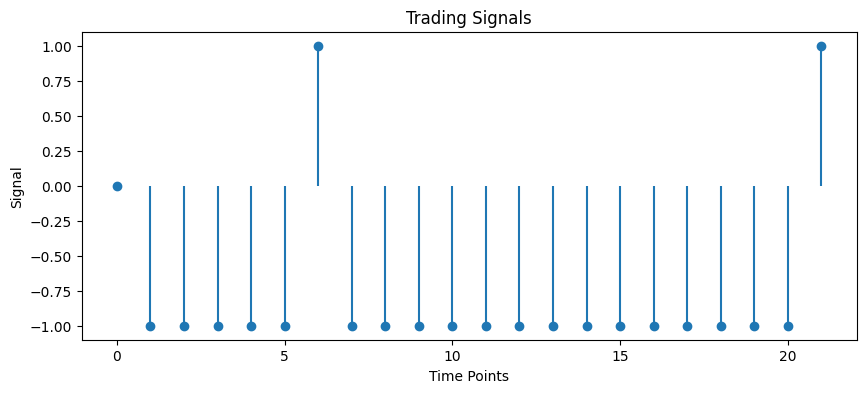

In [28]:
trading_signals = signal

time_points = np.arange(len(trading_signals))

# Plot the trading signals
plt.figure(figsize=(10, 4))
plt.stem(time_points, trading_signals, basefmt=" ", markerfmt="o", linefmt="-")
plt.title('Trading Signals')
plt.xlabel('Time Points')
plt.ylabel('Signal')
plt.show()

In [31]:
Total_Profit = profit_loss[-1] - profit_loss[0]
print('Total Profit: $'+ str(np.round(Total_Profit)))

Total Profit: $290.0
